In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
import joblib

df = pd.read_csv("train4.csv", encoding='latin-1')
#df.info()
z=['label','score','magnitude']
df=df[z]
df.describe()

,label,score,magnitude
count,14328.000000,14328.000000,14328.000000
mean,-0.465313,-0.159422,0.956044
std,0.755924,0.458869,0.635465
min,-1.000000,-0.900000,0.000000
25%,-1.000000,-0.500000,0.500000
50%,-1.000000,-0.200000,0.800000
75%,0.000000,0.100000,1.400000
max,1.000000,0.900000,4.800000


In [3]:
a=['score','magnitude'] 
X=df[a]
b=['label'] #label

y=df[b].values.tolist()
x1=df[['score']].values.tolist()
x2=df[['magnitude']].values.tolist()

for i in range(0,len(y)):
    if y[i][0] == -1:
        y[i]=0
    elif y[i][0] == 0:
        y[i]=1
    else:
        y[i]=2
        
ind=0
while len(y)>ind :
    if (y[ind] == 0 and x1[ind][0]>0) or (y[ind] == 2 and x1[ind][0]<0):
        del y[ind]
        del x1[ind]
        del x2[ind]
    else:
        x1[ind]=x1[ind][0]
        x2[ind]= x2[ind][0]
        ind+=1
        
#list -> dataframe
X = pd.DataFrame(list(zip(x1,x2)),columns = ['score','magnitude'])
y = pd.DataFrame(y,columns = ['label'])

In [4]:
rus = RandomUnderSampler(random_state = 21)
X, y = rus.fit_sample(X, y)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state= 21,stratify=y)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_validation = sc.transform(x_validation)
#x_train

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2

model = Sequential()
model.add(Dense(8, activation="tanh", input_shape = (x_train.shape[1],))) # Hidden Layer 1 that receives the Input from the Input Layer

model.add(Dense(16,activation="tanh")) # Hidden Layer 2
model.add(Dropout(0.1))

model.add(Dense(64,activation="tanh")) # Hidden Layer 3
model.add(Dropout(0.1))

model.add(Dense(8,activation="tanh")) # Hidden Layer 4

model.add(Dense(3,activation="softmax")) # Outout Layer

model.summary()

ModuleNotFoundError: No module named 'keras'

In [504]:
model.compile(optimizer='adam', loss = "categorical_crossentropy", metrics = ['accuracy'])

In [505]:
history=model.fit(x_train, y_train,validation_split=0.33, batch_size =512, epochs = 32)

Train on 2979 samples, validate on 1468 samples
Epoch 1/32
2979/2979 [==============================] - 9s 3ms/step - loss: 1.1182 - acc: 0.2934 - val_loss: 1.0729 - val_acc: 0.3713
Epoch 2/32
2979/2979 [==============================] - 0s 47us/step - loss: 1.0698 - acc: 0.3870 - val_loss: 1.0378 - val_acc: 0.4373
Epoch 3/32
2979/2979 [==============================] - 0s 48us/step - loss: 1.0421 - acc: 0.4337 - val_loss: 1.0222 - val_acc: 0.4564
Epoch 4/32
2979/2979 [==============================] - 0s 36us/step - loss: 1.0237 - acc: 0.4673 - val_loss: 1.0146 - val_acc: 0.4544
Epoch 5/32
2979/2979 [==============================] - 0s 48us/step - loss: 1.0165 - acc: 0.4572 - val_loss: 1.0065 - val_acc: 0.4537
Epoch 6/32
2979/2979 [==============================] - 0s 48us/step - loss: 1.0121 - acc: 0.4538 - val_loss: 1.0012 - val_acc: 0.4537
Epoch 7/32
2979/2979 [==============================] - 0s 42us/step - loss: 1.0090 - acc: 0.4599 - val_loss: 0.9971 - val_acc: 0.4544
Epoch 8/

In [506]:
test_loss, test_acc = model.evaluate(x_validation, y_validation)

1112/1112 [==============================] - 0s 193us/step


In [507]:
y_predict=model.predict(x_validation)

array([[0.4206215 , 0.2464005 , 0.33297798],
       [0.07979318, 0.4618809 , 0.45832592],
       [0.06491105, 0.22397411, 0.7111148 ],
       ...,
       [0.4206215 , 0.2464005 , 0.33297798],
       [0.07279682, 0.3906076 , 0.53659564],
       [0.08612657, 0.5158821 , 0.39799136]], dtype=float32)

In [508]:
print('Test accuracy:', test_acc)
print('Test lost:', test_loss)

Test accuracy: 0.46762589949498073
Test lost: 0.9954013378500081


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


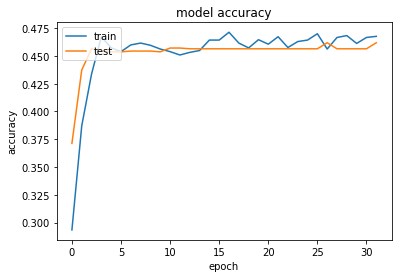

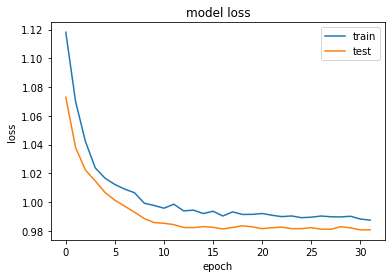

In [509]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()